In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_best_acc(path: str) -> float:
    with open(path) as f:
        best_acc = float(f.readlines()[-3].split()[-1])
        return best_acc

def get_gradient(path: str) -> float:
    with open(path) as f:
        for line in f:
            if "Gradient of loss on test:" in line:
                gradient = float(line.split(": ")[-1])
            
                return gradient

def get_energy(path: str) -> float:
    with open(path) as f:
        for line in f:
            if "Mean dirichilet energy:" in line:
                gradient = float(line.split(": ")[-1])
            
                return gradient

def agg_results(res):
    res = np.array(res)
    mean = np.mean(res, axis=1)
    std = np.std(res, axis=1)
    min = np.min(res, axis=1)
    max = np.min(res, axis=1)
    return mean, std, abs(mean - min), abs(mean - max)

def process_results_dict(results):
    for setting, res in results.items():
        results[setting] = agg_results(res)
    
    return results


In [10]:
settings = ["gin"]

results_grad = {setting: [] for setting in settings}
results_energy = {setting: [] for setting in settings}

# sizes = np.arange(10, 32, 2)
layers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for setting in settings:
    for layer in layers:
        gradients = []
        energies = []

        for seed in range(1, 4):
            path = f"../synthetic_smoothing/{setting}/depth-{layer}-seed-{seed}"
            grad = get_gradient(path)
            energy = get_energy(path)
            gradients.append(grad)
            energies.append(energy)
        results_grad[setting].append(gradients)
        results_energy[setting].append(energies)

results_grad = process_results_dict(results_grad)
results_energy = process_results_dict(results_energy)

([<matplotlib.axis.XTick at 0x7f84e4caab00>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

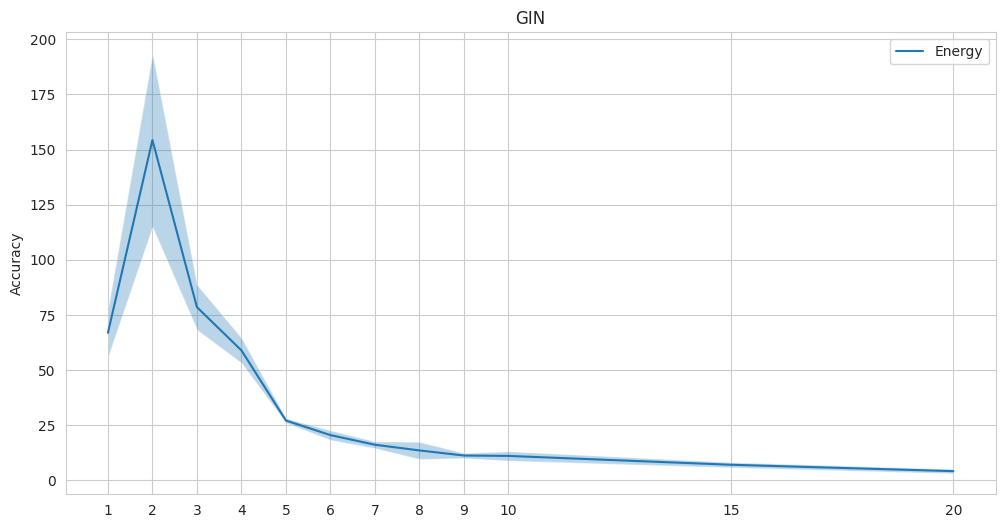

In [20]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
alpha=0.3

# res_mean, res_std, res_min, res_max = results_grad["gin"]
# plt.plot(layers, res_mean, label="Gradient")
# plt.fill_between(layers, res_mean - res_std, res_mean + res_std, alpha=alpha)

res_mean, res_std, res_min, res_max = results_energy["gin"]
plt.plot(layers, res_mean, label="Energy")
plt.fill_between(layers, res_mean - res_std, res_mean + res_std, alpha=alpha)


plt.legend()
plt.title(fr"GIN")
# plt.xlabel('Synthetic Graph Sizes')
plt.ylabel('Accuracy')
# plt.savefig("figures/synthetic_3_classes_train.pdf", bbox_inches='tight')
plt.xticks(layers)
# plt.ylim(0.0, 1.1)
